In [11]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from utils import *

In [ ]:
# meshgrid for deep, fno
x = np.linspace(-1, 1, 32)
[X2, Y2] = np.meshgrid(x, x)

# meshgrid for ours
x_lgl, w_lgl = legendre_gauss_lobatto(32)
[Y1, X1] = np.meshgrid(x_lgl, x_lgl, indexing='ij') 
W2D = np.outer(w_lgl, w_lgl)

# ic: 32, bc: 64, forcing: 24

In [18]:
def load_data_ic(sigma, N, t, n, model='ours'):
    data = scipy.io.loadmat(f'./data/fig3_ic/{N}sigma{sigma}_{t:.1f}.mat')
    
    aliases = {'fno': ['fno', 'FNO'],
               'deep': ['deep', 'Deep', 'DeepONet', 'DeepOnet', 'DON', 'don'],
               'our': ['ours', 'our', 'Ours', 'ours']}
    
    for key, value in aliases.items():
        if model in value:
            model = key
            break
        
    sol = data[model] 
    ubar = sol[2, n]
    vbar = sol[3, n]
    uex = sol[0, n]
    vex = sol[1, n]
    return ubar, vbar, uex, vex


def load_data_bc(sigma, n):
    data = scipy.io.loadmat(f'./data/fig3_bc/2d_caivty{sigma}sigma.mat')
    ubar = data['bar'][n, 0]
    vbar = data['bar'][n, 1]
    uex  = data['ex'][n, 0]
    vex  = data['ex'][n, 1]
    return ubar, vbar, uex, vex


def load_data_forcing(sigma, N, t, n, model='ours'):
    data = scipy.io.loadmat(f'./data/fig3_forcing/{N}sigma{sigma}_t{t:.1f}.mat')
    
    aliases = {'fno': ['fno', 'FNO'],
               'deep': ['deep', 'Deep', 'DeepONet', 'DeepOnet', 'DON', 'don'],
               'our': ['ours', 'our', 'Ours', 'ours']}
    
    for key, value in aliases.items():
        if model in value:
            model = key
            break

    sol = data[model] 
    ubar = sol[2, n]
    vbar = sol[3, n]
    uex = sol[0, n]
    vex = sol[1, n]
    return ubar, vbar, uex, vex

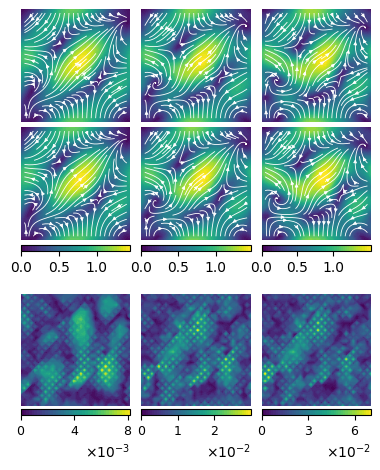

In [14]:
N = 600 
t = 1.0 
n = 4 

fig, ax = plt.subplots(3, 3, figsize=(5, 6))
fig.subplots_adjust(
    left=0.1,  
    right=0.8, 
    top=0.9,  
    bottom=0.2,
    wspace=0.1, 
    hspace=0.05
    )

title_fontsize = 12
cbar_shrink = 1
streamline_density = 0.8
streamline_arrowsize = 0.5
streamline_linewidth = 0.6

for i, sigma in enumerate([5, 9, 13]):

    ours_sigma = load_data_ic(sigma, N, t, n, model='ours')

    ref_sigma = np.sqrt(ours_sigma[2]**2 + ours_sigma[3]**2)
    sol_sigma = np.sqrt(ours_sigma[0]**2 + ours_sigma[1]**2)

    bound_sigma = [ref_sigma.min(), ref_sigma.max()]

    ax[0,i].contourf(X2, Y2, ref_sigma.T, levels=50, vmin=bound_sigma[0], vmax=bound_sigma[1])
    im = ax[1,i].contourf(X2, Y2, sol_sigma.T, levels=50, vmin=bound_sigma[0], vmax=bound_sigma[1])
    cbar = fig.colorbar(im, ax=ax[0:2,i], location='bottom', shrink=cbar_shrink, pad=0.02)
    cbar.set_ticks(control_ticks(ref_sigma, num_digits=1, num_ticks=3))

    ax[0,i].streamplot(x[1:-1], x[1:-1], (ours_sigma[2].T)[1:-1, 1:-1], (ours_sigma[3].T)[1:-1, 1:-1], density=streamline_density, linewidth=streamline_linewidth, arrowsize=streamline_arrowsize, color='white')
    ax[1,i].streamplot(x[1:-1], x[1:-1], (ours_sigma[0].T)[1:-1, 1:-1], (ours_sigma[1].T)[1:-1, 1:-1], density=streamline_density, linewidth=streamline_linewidth, arrowsize=streamline_arrowsize, color='white')

    im = ax[2, i].contourf(X2, Y2, np.abs(sol_sigma - ref_sigma).T, levels=50)
    cbar = fig.colorbar(im, ax=ax[2,i], location='bottom', shrink=cbar_shrink, pad=0.02)
    cbar.set_ticks(control_ticks(np.abs(sol_sigma - ref_sigma), num_digits=1, num_ticks=3))
    cbar.formatter = ticker.ScalarFormatter(useMathText=True)
    cbar.formatter.set_scientific(True)
    cbar.formatter.set_powerlimits((0, 0))  
    cbar.update_ticks()
    cbar.ax.tick_params(labelsize=9)  
    cbar.ax.yaxis.offsetText.set_fontsize(9)
    cbar.ax.yaxis.offsetText.set_x(7.5)
    cbar.ax.yaxis.offsetText.set_va('top')
    cbar.ax.yaxis.offsetText.set_y(-16)


def config(ax):
    ax.axis('off')

for i in range(3):
    for j in range(3):
        config(ax[i,j])

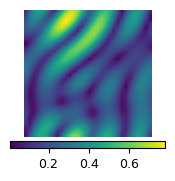

In [15]:
sigma = 13

input_data = scipy.io.loadmat(f'./data/fig3_ic/initial2dsigma{sigma}.mat')

u0 = input_data['u0'][n]
v0 = input_data['v0'][n]
U0 = np.sqrt(u0**2 + v0**2)

fig, ax = plt.subplots(1, 1, figsize=(2, 2))

im = ax.imshow(U0, interpolation='bilinear')
cbar = fig.colorbar(im, ax=ax, location='bottom', shrink=1, pad=0.02)
cbar.ax.tick_params(labelsize=9)

ax.axis('off');

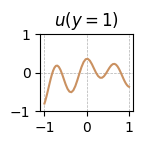

In [25]:
sigma = 20
n = 4

ours_sigma = load_data_bc(sigma, n)
ubc = ours_sigma[0][:,-1][1:-1]

x_lgl, _ = legendre_gauss_lobatto(64)

fig, ax = plt.subplots(figsize=(1.2, 1))

# Color blind palette
sns.set_palette("colorblind")
palette = sns.color_palette("colorblind")

ax.plot(x_lgl[1:-1], ubc, color=palette[5])

ax.set_title(rf'$u(y=1)$')
ax.set_ylim(-1.0, 1.0)
ax.grid(True, linestyle='--', linewidth=0.5)


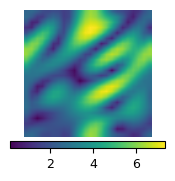

In [24]:
sigma = 20

input_data = scipy.io.loadmat(f'./data/fig3_forcing/force2dsigma{sigma}.mat')
fdata = input_data['fdata']

n = 2
f1 = fdata[n, -1, :, :, 0]
f2 = fdata[n, -1, :, :, 1]
F = np.sqrt(f1**2 + f2**2)

fig, ax = plt.subplots(1, 1, figsize=(2, 2))

im = ax.imshow(F, interpolation='bilinear')
cbar = fig.colorbar(im, ax=ax, location='bottom', shrink=1, pad=0.02)
cbar.ax.tick_params(labelsize=9)

ax.axis('off');